# Tensorflow Tutorial

## Basics
### Graph
   - Structure: Includes operations(nodes) and tensors(edges). It's a dataflow graph.  
   - Defines a namespace of all operations and tensors in the graph.
   - Collections: Associate metadata with keys. 
        - On creating a tf.Variable, it gets associated with the collections "global variables"(GraphKeys.GLOBAL_VARIABLES) and "trainable variables"(GraphKeys.TRAINABLE_VARIABLES).  
        - Later while using tf.train.Optimizer etc, these collections are used as default arguments to identify trainable params etc. 
        - tf.add_to_collection and tf.get_collection. 
    - All operations in the graph: 
    ```
    g = tf.get_default_graph()
    print(g.get_operations())
    ```  

### Session 
   - tf.session is like an executable (.pyc) if graph is a .py file. 
   - To run a session,
    ```
    sess = tf.Session()
    sess.run(var), where var = tensor whose output is required
    ```
    - "var" can be tensors (will get its value) or operations (like optimizer, will lead to parameters being trained and it will return None).  
    - Session will own resources like GPU etc, so best used as: ```with tf.Session() as sess:``` 
    
### Placeholders 
    ```
    x = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
    z = x+y
    sess.run(z, feed_dict={x:1.0, y:2.0})
    ```
### Layers
   - Combine tensors and operations for some function, like Dense.  
    ```
    x = tf.placeholder(tf.float32, shape=[None,3])
    linear_model = tf.layers.Dense(units=1)
    y = linear_model(x)
    Also, y = tf.layers.dense(x, units=1) : Shortcut function (cant reuse linear_model though)
    ```
    - Layers have variables that MUST be initialized using:
    ```
    init = tf.global_variables_initializer()
    sess.run(init)
    ```
    - Initialization should be done after completing the graph. 
### Feature Columns
   - Map raw data into formats the models can work with (like one hot encoding etc).

### Naming
   - Each tensor and operation can be named. 
    - They are named by default. Custom names can be added using the "name" argument. 
    - Use: get value of particular tensors in the network using their names. 
    - tf.name_scope() and tf.variable_scope()
    
### Tensors
   - Properties: data_type, shape, name
   - Types: tf.Variable, tf.constant, tf.placeholder, tf.SparseTensor
   - Rank (num_dims): ``` rank = tf.rank(tensor_name)``` ; shape: ```tensor_name.shape()```
   - After running a session, the values of tensors in that session can be found using ``` print tensor_name.eval(feed_dict={...})```
   - To print the value of a tensor (say x), 
   ```
   x = <some tensor>
   x = tf.Print(x,[x])
   result = x
   result.eval() -> This will print x
   ```

### tf.variable
   - ```x = tf.Variable(<init_val>, name=<name>)```
   - Needs to be initialized. Done in tf.global_variables_initialize()
   - Has a ```trainable=<bool>``` argument.

      
  
    

## Tensorboard
1. The following commands will create an event file.  
2. Used to visualize the graph.  
```
writer = tf.summary.FileWriter('log/...')
writer.add_graph(tf.get_default_graph())
```

In [3]:
import tensorflow as tf

a = tf.constant(1.0)
b = tf.constant(2.0)
c = a+b
print(a,b,c)

writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())

(<tf.Tensor 'Const_4:0' shape=() dtype=float32>, <tf.Tensor 'Const_5:0' shape=() dtype=float32>, <tf.Tensor 'add_2:0' shape=() dtype=float32>)


In [1]:
import tensorflow as tf

# Basic regression program
x = tf.constant([[1],[2],[3],[4]], dtype=tf.float32)
y_true = tf.constant([[0],[1],[2],[3]], dtype=tf.float32)
y_pred = tf.layers.dense(x, units=1)
loss = tf.losses.mean_squared_error(labels=y_true, predictions=y_pred)
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(10):
    _, loss_val = sess.run((train, loss))
    print(loss_val)
print(sess.run(y_pred))

writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())

0.842356
0.643987
0.505988
0.40988
0.342841
0.295974
0.263107
0.239957
0.22355
0.211824
[[ 0.64097816]
 [ 1.23908865]
 [ 1.83719909]
 [ 2.43530941]]


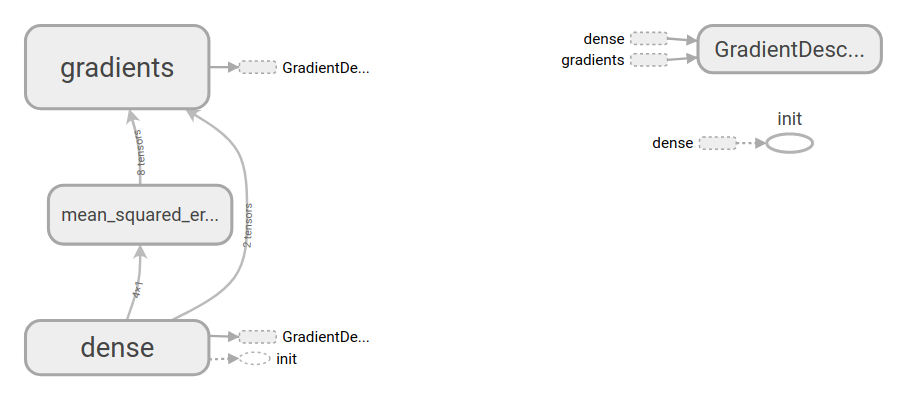